## Objective
Learn how to compare a Convolutional Neural Network using Batch Normalization with a regular Convolutional Neural Network to classify handwritten digits from the MNIST database.

## Read me Batch Norm for Convolution Operation

Like a fully connected network, we create a <code>BatchNorm2d</code> object, but we apply it to the 2D convolution object. First, we create objects <code>Conv2d</code> object; we require the number of output channels, specified by the variable <code>OUT</code>.  

<code>self.cnn1 = nn.Conv2d(in_channels=1, out_channels=OUT, kernel_size=5, padding=2) </code>


We then create a Batch Norm  object for 2D convolution as follows:


<code>self.conv1_bn = nn.BatchNorm2d(OUT)</code>


The parameter out is the number of channels in the output. We can then apply batch norm  after  the convolution operation :


<code>x = self.cnn1(x)</code>
 <code> x=self.conv1_bn(x)</code>

## Preparation

In [1]:
# Import the libraries we need to use in this lab
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
  plt.title('y = ' + str(data_sample[1]))

## Get the Data

In [2]:
IMAGE_SIZE = 16
composed = transforms.Compose(
    [
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor()
    ]
)

In [3]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.60MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.5MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
type(train_dataset[0][1])

int

In [5]:
train_dataset[3][1]

1

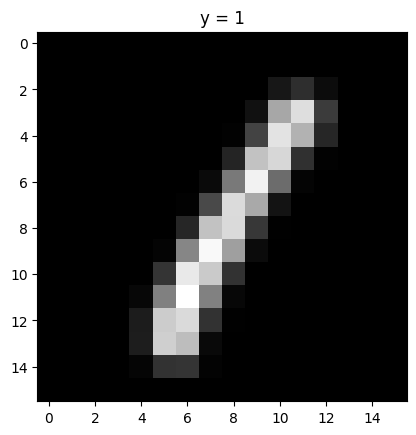

In [6]:
show_data(train_dataset[3])

## Build a Two Convolutional Neural Network Class

In [7]:
class CNN(nn.Module):

  # constructor
  def __init__(self, out_1=16, out_2=32):
    super(CNN, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)
    self.fc1 = nn.Linear(out_2*4*4, 10)

  # Prediction
  def forward(self, x):
    x = self.cnn1(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.cnn2(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    return x

In [25]:
class CNNBatch(nn.Module):

  # Constructor
  def __init__(self, out_1=16, out_2=32, number_of_classes=10):
    super(CNNBatch, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
    self.conv1_bn = nn.BatchNorm2d(out_1)
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
    self.conv2_bn = nn.BatchNorm2d(out_2)
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(out_2*4*4, number_of_classes)
    self.bn_fc1 = nn.BatchNorm1d(10)

  # Prediction
  def forward(self, x):
    x = self.cnn1(x)
    x = self.conv1_bn(x)
    x = torch.relu(x)
    x = self.maxpool1(x)
    x = self.cnn2(x)
    x = self.conv2_bn(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
    x = x.view(x.size(0), -1)
    x = self.fc1(x)
    x = self.bn_fc1(x)
    return x

In [13]:
def train_model(model, train_loader, validation_loader, optimizer, n_epochs=4):
  # global variables
  N_test = len(validation_dataset)
  accuracy_list = []
  loss_list = []
  for epoch in range(n_epochs):
    for x, y in train_loader:
      model.train()
      optimizer.zero_grad()
      z = model(x)
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      loss_list.append(loss.data)

    correct = 0
    for x_test, y_test in validation_loader:
      model.eval()
      yhat = model(x_test)
      _,label = torch.max(yhat.data, 1)
      correct += (label == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)

  return accuracy_list, loss_list

## Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model

In [29]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

In [30]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [31]:
acuracy_list_normal, loss_list_normal = train_model(model, train_loader, validation_loader, optimizer, n_epochs=10)

In [32]:
model_batch = CNNBatch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr=learning_rate)
accuracy_list_batch, loss_list_batch = train_model(model_batch, train_loader, validation_loader, optimizer, n_epochs=10)

## Analyze Results

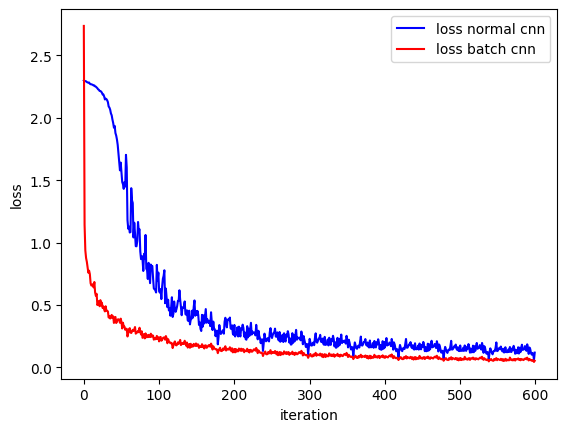

In [28]:
# Plot the loss and accuracy
plt.plot(loss_list_normal, 'b', label='loss normal cnn')
plt.plot(loss_list_batch, 'r', label='loss batch cnn')
plt.xlabel('iteration')
plt.ylabel("loss")
plt.legend()

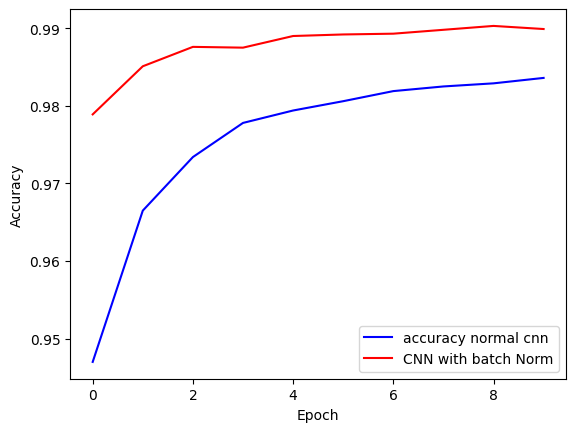

In [33]:
plt.plot(acuracy_list_normal, 'b', label='accuracy normal cnn')
plt.plot(accuracy_list_batch, 'r', label='CNN with batch Norm')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We see the CNN with batch norm performers better, with faster convergence.